In [1]:
import numpy as np
import sys
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
np.set_printoptions(threshold=sys.maxsize) # show full ndarray

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Inference

## Static: reason for the bent down beam

**Likelihood**

<AxesSubplot:xlabel='Distance', ylabel='Height'>

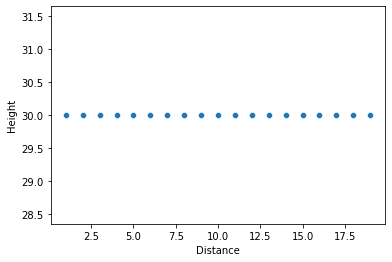

In [2]:
# Physical Beam
beam_samples = np.array(list(range(1, 20, 1)))
phy_height = np.array([30] * 19)
phy_beam = np.append(phy_height[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
phy_beam_df = pd.DataFrame(data = phy_beam, columns = column_values)
sns.scatterplot(data = phy_beam_df, x="Distance", y="Height")

**Prior**

In [3]:
prior_median_dist_df = pd.read_pickle('prior_median_dist_new-200')
distance = prior_median_dist_df['Radial Distance']
height = prior_median_dist_df['TransformedHeight']

prior_dict = defaultdict(list)
for i in range(len(distance)):
    if (not math.isnan(distance[i])):
        prior_dict[round(distance[i])].append(height[i])
        
prior = list()
for phy_distance in beam_samples:
    if (phy_distance in list(prior_dict.keys())) and (max(prior_dict[phy_distance]) >= 0):
        prior.append(max(prior_dict[phy_distance]))
    else:
        prior.append(math.nan)
prior

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 255.0,
 78.0,
 57.0,
 39.0,
 29.0,
 17.0,
 11.0,
 6.0,
 3.0,
 nan]

In [4]:
prior_beam = np.append(np.array(prior)[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
prior_beam_df = pd.DataFrame(data = prior_beam, columns = column_values)

**Posterior**

In [5]:
def combined_mean (dm, dt, vm, vt):
    return (1/vm*dm +1/vt*dt) / (1/vm + 1/vt)

In [6]:
per_height = []
for i in range(len(beam_samples)):
    if not math.isnan(prior[i]): 
        per_height.append(combined_mean(prior[i], height[i], 1.4, 1.4))
    else:
        per_height.append(height[i])

<AxesSubplot:xlabel='Distance', ylabel='Height'>

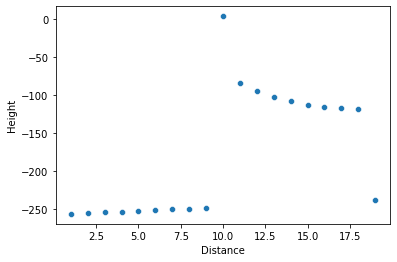

In [7]:
per_beam = np.append(np.array(per_height)[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
per_beam_df = pd.DataFrame(data = per_beam, columns = column_values)
sns.scatterplot(data = per_beam_df, x="Distance", y="Height")

issue:
- 1. rouding issue.
- 2. prior only reaches 19m.